<a href="https://colab.research.google.com/github/Pesanas/ciencia-de-dados-adult/blob/master/ciencia_de_dados_adult.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Para analisar e desfrutar deste projeto, não se esqueça de clicar em todos os [ ] para executar as células. Alterações que você fizer serão feitas em uma cópia, aproveite!

#**UCI Machine Learning Repository - Adult Repository:**

https://archive.ics.uci.edu/ml/datasets/Adult

# **Importação de Bíbliotecas**

In [143]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# **Carregar CSV da UCI Machine Learning Repository**

In [144]:
adult_kaggle = pd.read_csv('https://raw.githubusercontent.com/Pesanas/ciencia-de-dados-adult/master/adult%20kaggle.csv')

# **Tomada de Decisão 1:**

Como o filme de 2004 "13 Going On 30" defendia, 30 é a idade do sucesso, com essa afirmação vamos começar um aquecimento com gráficos:
 
Quantidade de pessoas que conseguiram fazer 50 mil ao ano com de 30 anos de idade em relação às outras idades:

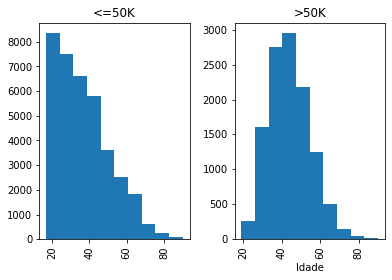

In [145]:
adult_kaggle.hist(column='age',by='income')
plt.xlabel('Idade')
plt.show()

Conclusão:
 
De acordo com o gráfico gerado através do dataset disponibilizado pela UCI, a idade do sucesso está mais para 50 anos de idade.

#**Tomada de Decisão 2:**

Andrey Rayanovsky nascido na Rússia, vivenciou a Revolução Russa em 1917 e viu a União Soviética se tornar o primeiro país socialista do mundo, Andrey não apoiava o socialismo pois defendia que grandes homens podem traçar seu próprio caminho, revoltado com a situação de seu país mudou seu nome para Andrew Ryan e migrou para os Estados Unidos, Andrew defende inclusive que você não pode depender de outra pessoa, um parceiro, e deve traçar seu caminho você próprio, com essa afirmação vamos analisar o gráfico a seguir:
 
Quantidade de pessoas que conseguiram fazer 50 mil ao ano solteiras, em relação a quantidade de pessoas que conseguiram fazer 50 mil ao ano casadas:

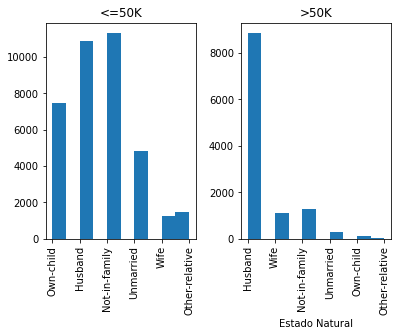

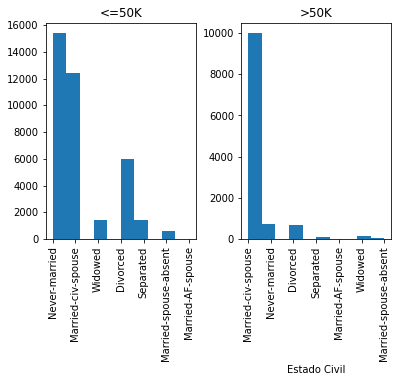

In [146]:
adult_kaggle.hist(column='relationship',by='income')
plt.xlabel('Estado Natural')
adult_kaggle.hist(column='marital-status',by='income')
plt.xlabel('Estado Civil')
plt.show()

Conclusão:
 
De acordo com os gráfico gerados, Andrew Ryan está completamente errado em sua filosofia, uma vez que menos de 1.000 pessoas solteiras fizeram 50 mil ao ano, contra quase 10.000 casados que conseguiram o feito.

Curiosidade:
 
Graças aos gráficos sobre "Estado Natural", percebemos que existe algo destacado nos gráficos de "Estado Civil", a quantidade de homens no dataset é enorme, então decidimos calcular a quantidade de homens e mulheres registradas e encontrar um possível motivo para isso:

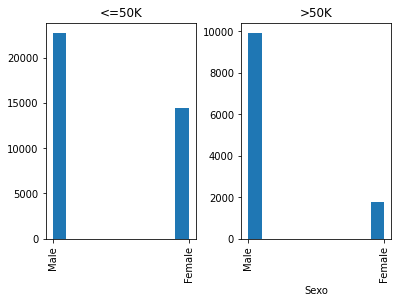

In [147]:
adult_kaggle.hist(column='gender',by='income')
plt.xlabel('Sexo')
plt.show()

Curiosidade:
 
Analisando a documentação, descobrimos que o dataset se trata apenas dos Estados Unidos, no ano de 1994, usando ferramentas do Google de cálculo de população mundial, hoje em 2020 existem mais mulheres do que homens no mundo, mas no ano de 1994 a proporção está correta, uma impressão que chamou nossa atenção durante o desenvolvimento dessa atividade porém nada além disso.

#**Machine Learning:**

De acordo com a documentação sobre o dataset Adult da UCI no link abaixo, o mesmo se trata de dados que classificam as pessoas, de início pensamos imediatamente em uma árvore de classificação, mas fizemos outros testes com regressão linear o que resultou 32% de acurácia, após partir para o pressuposto, ficamos satisfeitos com a árvore de classificação resultando 85% de acurácia.

A seguir, todo o passo a passo de como foram feitos os treinos e testes.
 
 
UCI Machine Learning Repository - Adult Repository: 
https://archive.ics.uci.edu/ml/datasets/Adult

### **Árvore de Classificação**

In [148]:
from sklearn.preprocessing import LabelEncoder

In [149]:
le =LabelEncoder()

In [150]:
for col in adult_kaggle.columns:
      if adult_kaggle[col].dtypes=='object':
           adult_kaggle[col] = le.fit_transform(adult_kaggle[col])

In [151]:
from sklearn.model_selection import train_test_split

X = adult_kaggle[adult_kaggle.columns[0:13]].to_numpy()
y = adult_kaggle['income'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=123)

In [152]:
X

array([[    25,      4, 226802, ...,      0,      0,     40],
       [    38,      4,  89814, ...,      0,      0,     50],
       [    28,      2, 336951, ...,      0,      0,     40],
       ...,
       [    58,      4, 151910, ...,      0,      0,     40],
       [    22,      4, 201490, ...,      0,      0,     20],
       [    52,      5, 287927, ...,  15024,      0,     40]])

In [153]:
y

array([0, 0, 1, ..., 0, 0, 1])

In [154]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=2,
                             min_samples_split=20,
                             random_state=123)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [155]:
clf.score(X_train,y_train)

0.8258851792197865

In [156]:
clf.score(X_test,y_test)

0.8280239128654492

In [157]:
from sklearn.tree import DecisionTreeRegressor

clf = DecisionTreeRegressor(max_depth=2,
                             min_samples_split=20,
                             random_state=123)
clf.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=20,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=123, splitter='best')

In [158]:
clf.score(X_train,y_train)

0.28811903945856265

In [159]:
clf.score(X_test,y_test)

0.29300496916267527

In [160]:
from sklearn.linear_model import SGDRegressor

clf = SGDRegressor(loss='squared_loss', learning_rate='constant', max_iter=10,
                   eta0=0.01, verbose=1, tol=None, random_state=123)

clf.fit(X_train, y_train)

-- Epoch 1
Norm: 1605194478288441.25, NNZs: 13, Bias: 1489995690748.264160, T: 36631, Avg. loss: 63696810061212572563441391964363027382272.000000
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 3250704807505151.00, NNZs: 13, Bias: 2359995690748.264160, T: 73262, Avg. loss: 61877877662947522263834993434340611850240.000000
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 1551845457395411.50, NNZs: 13, Bias: 1649995690748.264160, T: 109893, Avg. loss: 62481612272356116638287482356004242325504.000000
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 1909673268446142.25, NNZs: 13, Bias: 3219995690748.264160, T: 146524, Avg. loss: 62452553394020441096511546480044116279296.000000
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 1581530229593732.00, NNZs: 13, Bias: 3049995690748.264160, T: 183155, Avg. loss: 62298084653159480840589410591272108818432.000000
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 702503951576370.88, NNZs: 13, Bias: 2979995690748.264160, T: 219786, Avg. l

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='constant', loss='squared_loss', max_iter=10,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=123,
             shuffle=True, tol=None, validation_fraction=0.1, verbose=1,
             warm_start=False)

In [161]:
clf.score(X_train,y_train)

-5.502203841325753e+40

In [162]:
clf.score(X_test,y_test)

-5.458833920363601e+40

In [163]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = clf.predict(X_test)

print(f"Acurácia de Teste: ±{mean_absolute_error(y_test, y_pred):1.0f}")

Acurácia de Teste: ±86918570917672828928


A saída de streaming foi truncada nas últimas 5000 linhas.
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 169492806263312672.00, NNZs: 13, Bias: -115932887328458.656250, T: 183155, Avg. loss: 432937217170546547750655605581008911802040320.000000
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 65515126308320616.00, NNZs: 13, Bias: -211823797328458.656250, T: 219786, Avg. loss: 429525824514661868118630216670582808009244672.000000
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 154036491734543424.00, NNZs: 13, Bias: -269358343328458.625000, T: 256417, Avg. loss: 430890413380159293486910663501334838750740480.000000
Total training time: 0.05 seconds.
-- Epoch 8
Norm: 242064967771329984.00, NNZs: 13, Bias: -143449409328458.625000, T: 293048, Avg. loss: 424938793418947235161814630184704682926014464.000000
Total training time: 0.05 seconds.
-- Epoch 9
Norm: 258130538041968224.00, NNZs: 13, Bias: -134277235328458.625000, T: 329679, Avg. loss: 4322987870347465464778614028110652967737

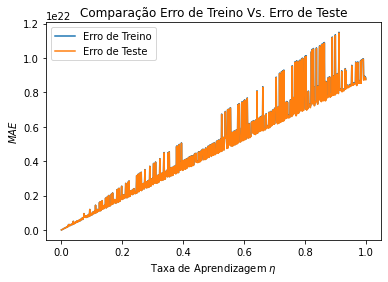

In [164]:
# inicia duas listas vazias
mae_train_values = []
mae_test_values = []

# eixo X do gráfico
x_axis = np.linspace(1e-6, 1, 1000)

for i in x_axis:
    clf =  clf.set_params(eta0=i)
    clf.fit(X_train, y_train)
    
    y_train_pred = clf.predict(X_train)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_train_values.append(mae_train)
    
    y_test_pred = clf.predict(X_test)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    mae_test_values.append(mae_test)
    

plt.plot(x_axis, mae_train_values, label='Erro de Treino')
plt.plot(x_axis, mae_test_values, label='Erro de Teste')
plt.xlabel('Taxa de Aprendizagem $\eta$')
plt.ylabel('$MAE$')
plt.legend()
plt.title('Comparação Erro de Treino Vs. Erro de Teste')
plt.show()